In [1]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Activation
from tensorflow.python.keras.optimizers import SGD


In [2]:
# load Data
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
#Reshaping MAtrix to vector
RESHAPE = 784  #28*28

X_train =  X_train.reshape(60000, RESHAPE)
X_test = X_test.reshape(10000, RESHAPE)

X_train =  X_train.astype('float32')   # Converting for Normalization
X_test = X_test.astype('float32')

In [6]:
#Normalizing
X_train = X_train/255
X_test = X_test/255

In [7]:
NB_CLASSES = 10

In [8]:
# One Hot Encoding TARGET (y)

y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES )

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import sys
np.set_printoptions(threshold=sys.maxsize)    #It shows the whole data (when data is very large and not displayed in the Jupyter notebook ....)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


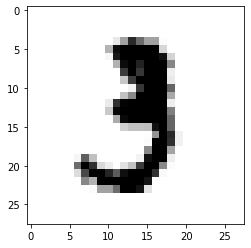

In [11]:
plt.imshow(X_train[10].reshape(28,28),cmap='Greys')

In [12]:
# Making a Sequential Model
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(num_pixels, activation='relu', input_shape=(RESHAPE,)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Add one hidden layer 
model.add(Dense(500, activation='relu'))3
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Add one hidden layer 
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Add an output layer 
model.add(Dense(NB_CLASSES, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 250)               1

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 4s - loss: 0.2919 - acc: 0.9110 - val_loss: 0.1184 - val_acc: 0.9636
Epoch 2/10
60000/60000 - 4s - loss: 0.1299 - acc: 0.9606 - val_loss: 0.0850 - val_acc: 0.9715
Epoch 3/10
60000/60000 - 4s - loss: 0.0961 - acc: 0.9702 - val_loss: 0.0836 - val_acc: 0.9737
Epoch 4/10
60000/60000 - 4s - loss: 0.0814 - acc: 0.9749 - val_loss: 0.0713 - val_acc: 0.9777
Epoch 5/10
60000/60000 - 4s - loss: 0.0705 - acc: 0.9780 - val_loss: 0.0702 - val_acc: 0.9803
Epoch 6/10
60000/60000 - 4s - loss: 0.0609 - acc: 0.9808 - val_loss: 0.0681 - val_acc: 0.9796
Epoch 7/10
60000/60000 - 4s - loss: 0.0555 - acc: 0.9820 - val_loss: 0.0660 - val_acc: 0.9808
Epoch 8/10
60000/60000 - 4s - loss: 0.0512 - acc: 0.9833 - val_loss: 0.0631 - val_acc: 0.9815
Epoch 9/10
60000/60000 - 4s - loss: 0.0473 - acc: 0.9845 - val_loss: 0.0619 - val_acc: 0.9830
Epoch 10/10
60000/60000 - 4s - loss: 0.0429 - acc: 0.9864 - val_loss: 0.0572 - val_acc: 0.9828


In [16]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: ",scores[1])

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0572 - acc: 0.9828
Test Accuracy:  0.9828


In [17]:
#Prediction
image_index = 35
pred = model.predict(X_test[image_index].reshape(1,784))
print(pred)

[[1.9300705e-07 9.5175693e-07 9.9999118e-01 5.6493323e-06 2.0419033e-09
  2.1330230e-08 1.5285254e-08 1.5743788e-06 2.9254329e-07 8.1899447e-09]]


In [18]:
print(pred.argmax())

2


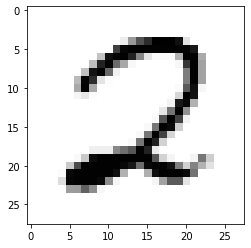

In [19]:
plt.imshow(X_test[35].reshape(28,28),cmap='Greys')